In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import functions

# count dfs for the TL case, input: mean annual, daily 

In [5]:
%%time


# langtang
folder_path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/4landcover_25percent/mustang_climate_cut'
elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_mustang.csv')[['cellnr2','band_data']] 
landcover = 'landcover4'
location = 'mustang'

column = 'dfs'
result_df = pd.DataFrame()


# Iterate over the files in the folders
for folder_name in os.listdir(folder_path):
    # skip all csvs and . files
    if folder_name.endswith('.csv'):
        continue
    if folder_name.startswith('.'):
        continue 
    
    file_path = os.path.join(folder_path, folder_name, 'Sediment.out') #create a path to file 
    
    if os.path.isfile(file_path): #check if its there 
        # read file 
        output_df = pd.read_csv(file_path)
        # count dfs per given time 
        output_df = functions.count_dfs_per_time(output_df, column, 'year')
        
        # take the COUNT column 
        name_column = output_df['count']
        # rename the columns 
        column_name = f'{column}_{folder_name}'
        result_df[column_name] = name_column
        result_df.columns = [col[-3:] for col in result_df.columns]


annaul_df_count = functions.add_elevation_to_df_count(result_df, elevation)


output = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_25percent/'
# annaul_df_count.to_csv(output + f'{location}_annual_df_count_annualmean_{landcover}.csv')

<timed exec>:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


default land cover. monthly data: same
CPU times: user 52.6 s, sys: 2.6 s, total: 55.2 s
Wall time: 1min 1s


# plot df count - langtang 

In [37]:
def prepare_dfcount_for_plot(dfcount):
    melted = pd.melt(dfcount, id_vars=['D'], var_name='elevation', value_name='dfs_count')
    melted['elevation'] = melted['elevation'].str.split('.').str[0].astype(float)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation200, axis=1)
    melted = melted.sort_values('elevation_bin')
    return melted 


In [38]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_mean_annual/'

langtang1 = pd.read_csv(path + 'langtang_annual_df_count_annualmean_landcover1.csv', index_col = 0)
langtang2 = pd.read_csv(path + 'langtang_annual_df_count_annualmean_landcover2.csv', index_col = 0)
langtang3 = pd.read_csv(path + 'langtang_annual_df_count_annualmean_landcover3.csv', index_col = 0)
langtang4 = pd.read_csv(path + 'langtang_annual_df_count_annualmean_landcover4.csv', index_col = 0)

langtang1 = prepare_dfcount_for_plot(langtang1)
langtang2 = prepare_dfcount_for_plot(langtang2)
langtang3 = prepare_dfcount_for_plot(langtang3)
langtang4 = prepare_dfcount_for_plot(langtang4)


In [41]:
langtang4

,D,elevation,dfs_count,elevation_bin
463,2005,2448.0,2.0,2400 - 2599
448,1990,2448.0,1.0,2400 - 2599
449,1991,2448.0,1.0,2400 - 2599
450,1992,2448.0,0.0,2400 - 2599
451,1993,2448.0,3.0,2400 - 2599
...,...,...,...,...
1570,1992,6335.0,NaN,>=6000
1569,1991,6335.0,NaN,>=6000
1568,1990,6335.0,NaN,>=6000
1582,2004,6335.0,NaN,>=6000


<AxesSubplot:label='a', xlabel='elevation_bin', ylabel='dfs_count'>

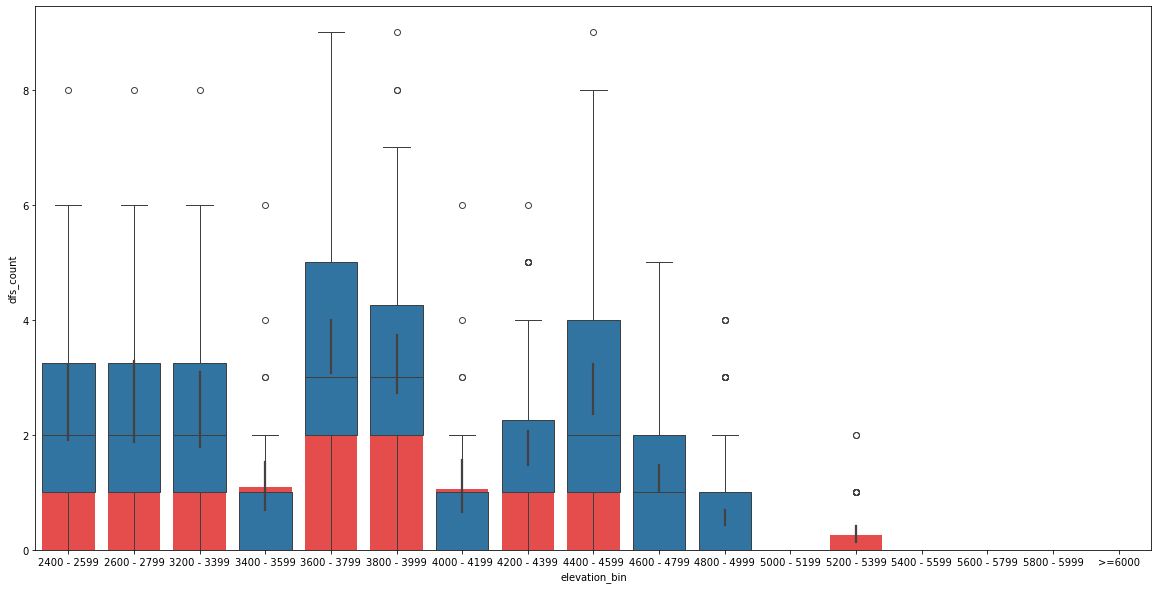

In [107]:
fig = plt.figure(figsize=(20, 10))
mosaic = fig.subplot_mosaic('''
                            aaa
                            ''')


sns.boxplot(ax = mosaic['a'], x='elevation_bin', y='dfs_count', data=melted)
sns.barplot(ax = mosaic['a'], x='elevation_bin', y='dfs_count', data=melted, alpha = 0.8, color = 'red')


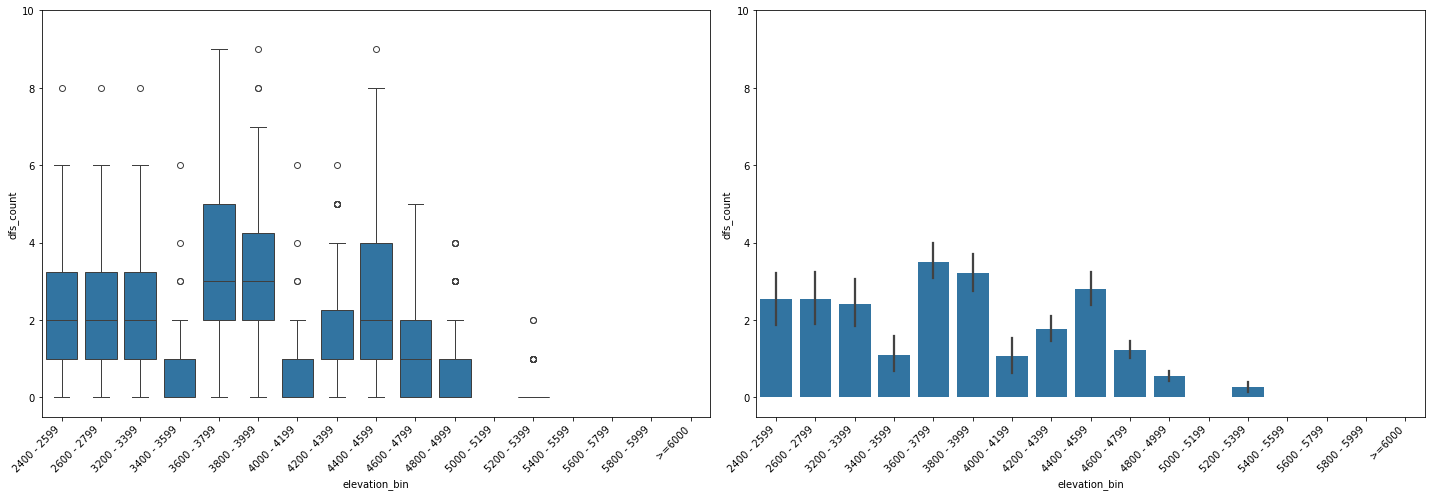

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure with a specific size
fig = plt.figure(figsize=(20, 7), layout = 'tight')

mosaic = fig.subplot_mosaic('''
                            ab
                            ''')

sns.boxplot(ax=mosaic['a'], x='elevation_bin', y='dfs_count', data=melted)
sns.barplot(ax=mosaic['b'], x='elevation_bin', y='dfs_count', data=melted)

mosaic['a'].set_ylim(-0.5, 10)
mosaic['b'].set_ylim(-0.5, 10)

plt.setp(mosaic['a'].get_xticklabels(), rotation=45, ha="right")
plt.setp(mosaic['b'].get_xticklabels(), rotation=45, ha="right")

plt.show()

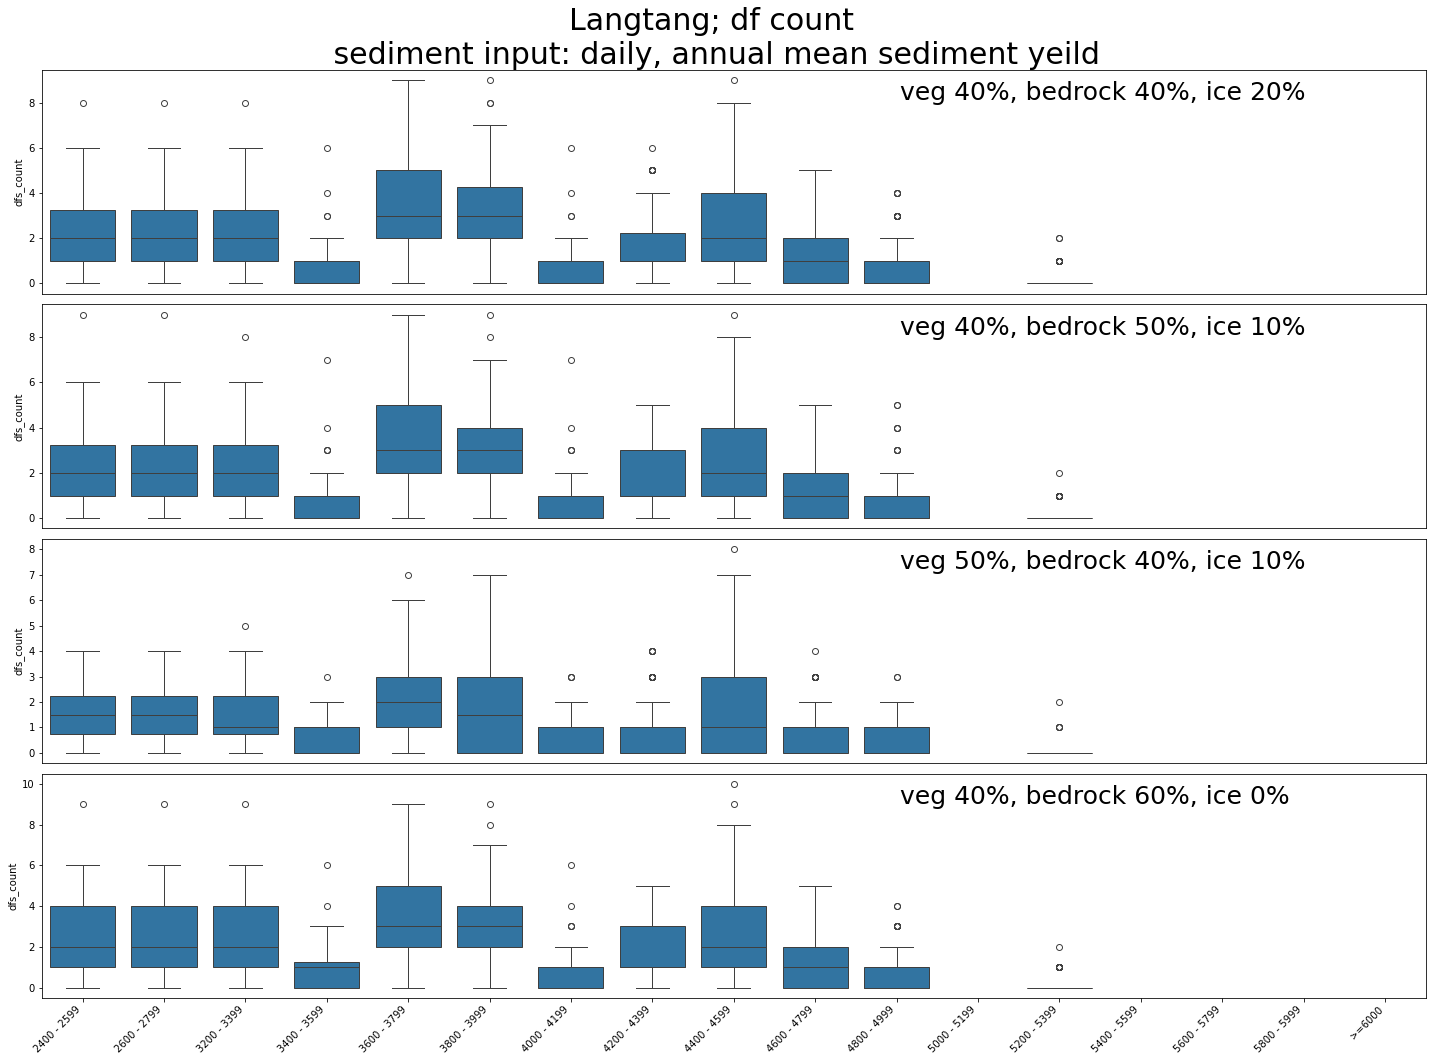

In [73]:
fig = plt.figure(figsize=(20, 15), layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')


sns.boxplot(ax = mosaic['a'], x='elevation_bin', y='dfs_count', data=langtang1)#, palette = 'magma_r') 
sns.boxplot(ax = mosaic['b'], x='elevation_bin', y='dfs_count', data=langtang2)#, palette = 'magma_r') 
sns.boxplot(ax = mosaic['c'], x='elevation_bin', y='dfs_count', data=langtang3)#, palette = 'magma_r') 
sns.boxplot(ax = mosaic['d'], x='elevation_bin', y='dfs_count', data=langtang4)#, palette = 'magma_r') 

# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

# Removing the x-axis label from all subplots
mosaic['a'].set(xlabel=None)
mosaic['b'].set(xlabel=None)
mosaic['c'].set(xlabel=None)
mosaic['d'].set(xlabel=None)

# Hide x-ticks for all subplots except 'd'
mosaic['a'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['b'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['c'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.setp(mosaic['d'].get_xticklabels(), rotation=45, ha="right")


fig.suptitle('Langtang; df count \n sediment input: daily, annual mean sediment yeild ', fontsize=30)

plt.show()




# mustang 

In [59]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_mean_annual/'

mustang1 = pd.read_csv(path + 'mustang_annual_df_count_annualmean_landcover1.csv', index_col = 0)
mustang2 = pd.read_csv(path + 'mustang_annual_df_count_annualmean_landcover2.csv', index_col = 0)
mustang3 = pd.read_csv(path + 'mustang_annual_df_count_annualmean_landcover3.csv', index_col = 0)
mustang4 = pd.read_csv(path + 'mustang_annual_df_count_annualmean_landcover4.csv', index_col = 0)

mustang1 = prepare_dfcount_for_plot(mustang1)
mustang2 = prepare_dfcount_for_plot(mustang2)
mustang3 = prepare_dfcount_for_plot(mustang3)
mustang4 = prepare_dfcount_for_plot(mustang4)


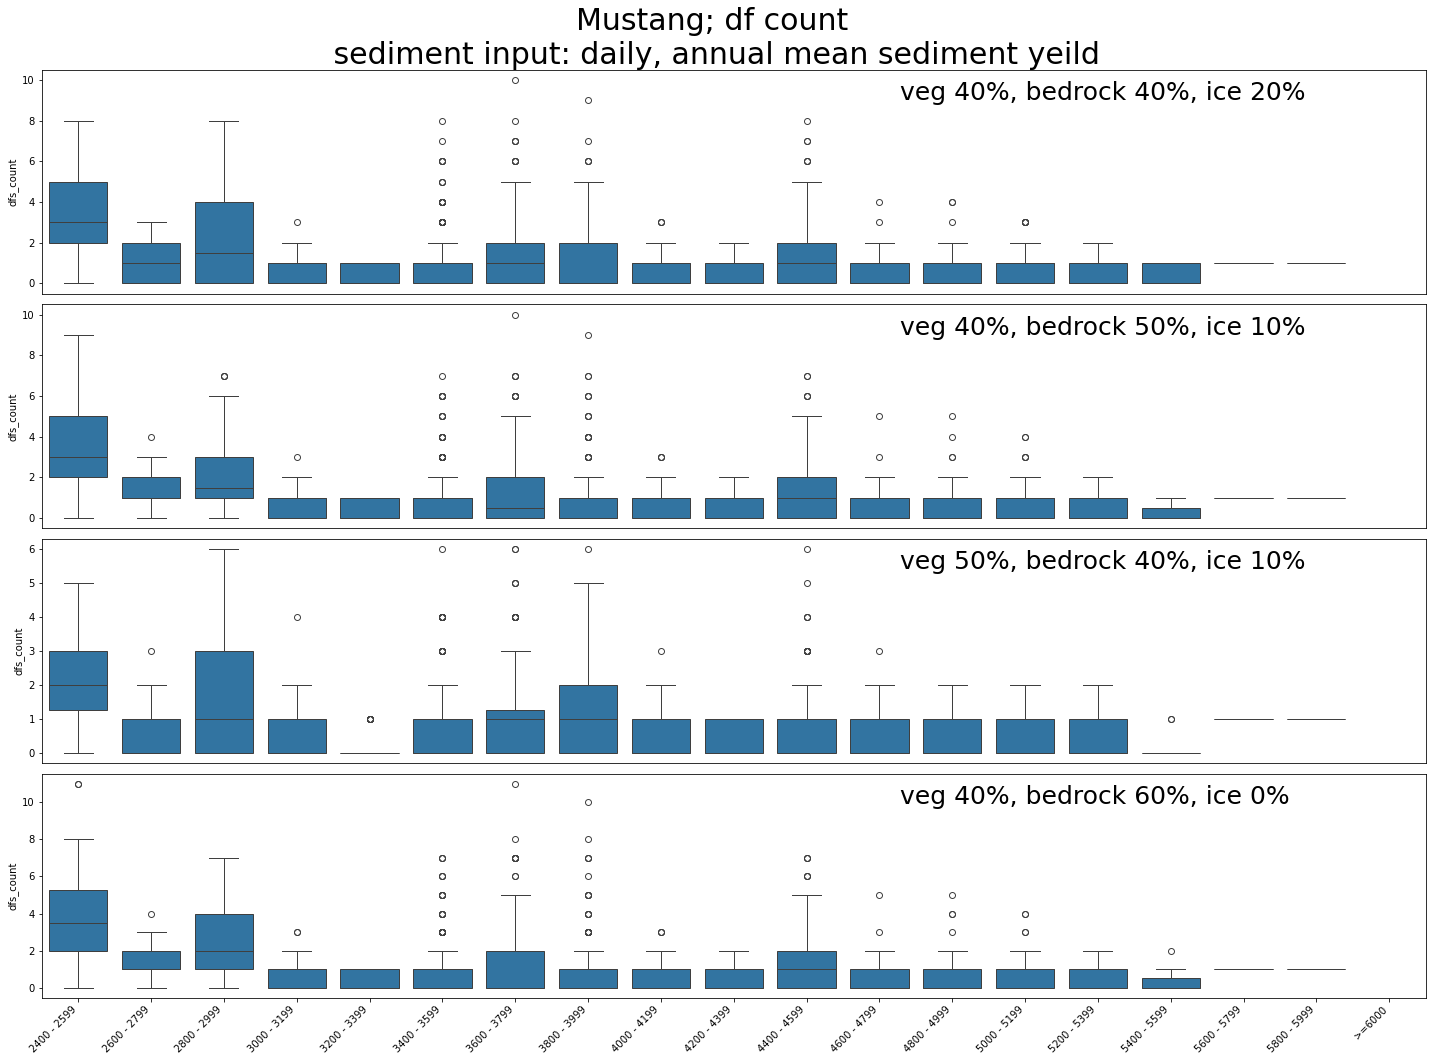

In [108]:
fig = plt.figure(figsize=(20, 15), layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')


sns.boxplot(ax = mosaic['a'], x='elevation_bin', y='dfs_count', data=mustang1)#, palette = 'magma_r') 
sns.boxplot(ax = mosaic['b'], x='elevation_bin', y='dfs_count', data=mustang2)#, palette = 'magma_r') 
sns.boxplot(ax = mosaic['c'], x='elevation_bin', y='dfs_count', data=mustang3)#, palette = 'magma_r') 
sns.boxplot(ax = mosaic['d'], x='elevation_bin', y='dfs_count', data=mustang4)#, palette = 'magma_r') 

# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

# Removing the x-axis label from all subplots
mosaic['a'].set(xlabel=None)
mosaic['b'].set(xlabel=None)
mosaic['c'].set(xlabel=None)
mosaic['d'].set(xlabel=None)

# Hide x-ticks for all subplots except 'd'
mosaic['a'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['b'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['c'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.setp(mosaic['d'].get_xticklabels(), rotation=45, ha="right")


fig.suptitle('Mustang; df count \n sediment input: daily, annual mean sediment yeild ', fontsize=30)



plt.show()